In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from PIL import Image

In [4]:
from our_mpeg import load

In [5]:
example = load("/home/flamerokz/lfv-compression/data/spaceship.zip")

In [6]:
im1 = example[0,0,0,:,:]
im2 = example[1,0,0,:,:]

In [7]:
?Image.fromarray

In [8]:
Image.fromarray(im1 - im2)

<PIL.Image.Image image mode=RGB size=160x120 at 0x7F9B8A13C6A0>

In [9]:
from our_mpeg import break_blocks, merge_blocks

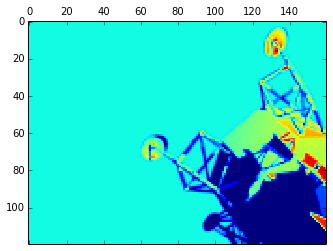

In [10]:
plt.matshow(im1[:,:,0])

0.0


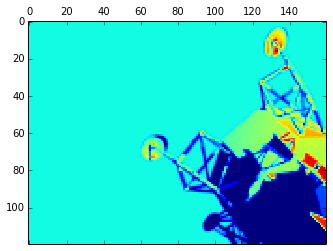

In [11]:
bb = break_blocks(im1)
im1_recovered = merge_blocks(bb)
plt.matshow(im1_recovered[:,:,0])
print(np.linalg.norm(im1_recovered - im1))

In [12]:
from our_mpeg import compute_reference, apply_reference
from our_mpeg import transform, inverse_transform

In [13]:
im1_blocks = break_blocks(im1)
im1_ref    = compute_reference(im1_blocks, im2)
im1_res = [[im1_ref[x][y][1] for y in range(0, len(im1_ref[x]))] for x in range(0, len(im1_ref))]
im1_res_trans = transform(im1_res)

In [14]:
im1_res_inv_trans = inverse_transform(im1_res_trans)
im1_ref_recovered = [[(im1_ref[x][y][0],im1_res_inv_trans[x][y]) for y in range(0, len(im1_res_inv_trans[x]))] for x in range(0, len(im1_res_inv_trans))]
im1_blocks_recovered = apply_reference(im1_ref_recovered, im2)
im1_recovered = merge_blocks(im1_blocks_recovered)

0.0


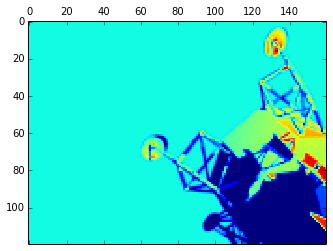

In [15]:
plt.matshow(im1_recovered[:,:,0])
print(np.linalg.norm(im1_recovered - im1))